In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [133]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import central_crop, pad_to_bounding_box, resize

In [134]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [135]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.4 
session = tf.compat.v1.Session(config=config)

In [136]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2052798740945972787
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1073741824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5973566675408247569
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [140]:
countrys = os.listdir('img')

In [137]:
x = []
y = []
size = (360, 360)
for country in countrys[:10]:
    names = os.listdir(f"img/{country}")
    for name in names:
        for i in range(100):
            path = f"img/{country}/{name}/{i}.jpg"
            img = load_img(path)
            img_array = img_to_array(img) / 255
            img_resize = resize(img_array, size)
            x.append(np.array(img_resize))
            y.append(name)
        print(f"{name} transform Successful")
x = np.array(x)

Griffith Observatory transform Successful
Statue of Liberty transform Successful
Sydney Opera House transform Successful
Corcovado transform Successful
Escadaria Selaron transform Successful
Angkor Wat transform Successful
Easter Island transform Successful
Canton Tower transform Successful
Forbidden City transform Successful
Potala Palace transform Successful
qin terracotta warriors transform Successful
The Great Wall transform Successful
Staromestske namesti transform Successful
abu simbel transform Successful
Colossi of Memnon transform Successful
Egypt Pyramid transform Successful
Temple of Karnak transform Successful
St. Paul's Cathedral transform Successful
Stonehenge transform Successful
Tower Bridge transform Successful


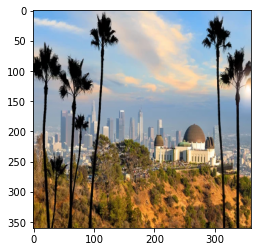

In [141]:
plt.imshow(x[0])

In [142]:
x_split = x[:500]
y_split = y[:500]

In [143]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
x_train, x_test, y_train, y_test = train_test_split(x_split, y_split, test_size=0.2, random_state=111)

In [144]:
en = LabelEncoder()
y_train_en = en.fit_transform(y_train)
y_test_en = en.fit_transform(y_test)

In [145]:
y_train_oh = to_categorical(y_train_en)
y_test_oh = to_categorical(y_test_en)

In [146]:
y_train_oh.shape

(400, 5)

In [147]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Conv2D(8, (3,3), strides=1, activation='relu', padding='same', input_shape=(360, 360, 3)))
    model.add(MaxPooling2D(4))
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (3,3), strides=1, activation='relu', padding='same'))
    model.add(MaxPooling2D(4))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 360, 360, 8)       224       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 90, 90, 8)        0         
 g2D)                                                            
                                                                 
 dropout_87 (Dropout)        (None, 90, 90, 8)         0         
                                                                 
 conv2d_59 (Conv2D)          (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 22, 22, 16)       0         
 g2D)                                                            
                                                                 
 dropout_88 (Dropout)        (None, 22, 22, 16)      

In [148]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [149]:
with tf.device('/GPU:0'):
    hist = model.fit(x_train, y_train_oh, batch_size=2, epochs=20, validation_data=(x_test, y_test_oh))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

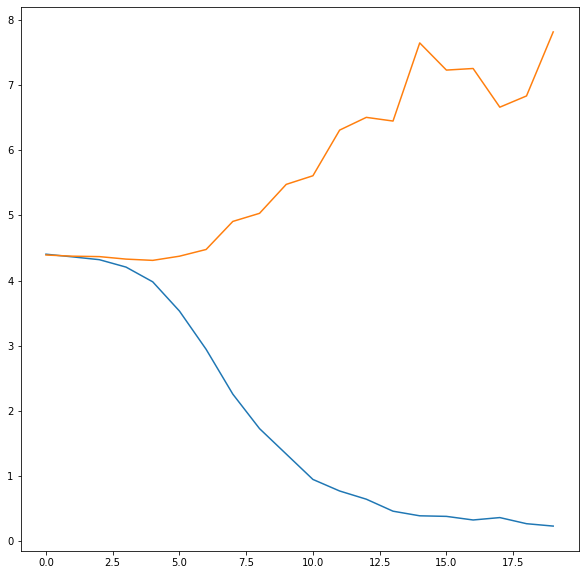

In [16]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

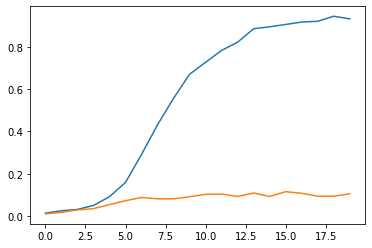

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [18]:
model.evaluate(x_test, y_test_oh)

25/25 [==============================] - 0s 3ms/step - loss: 7.8184 - accuracy: 0.1050


[7.818350791931152, 0.10499999672174454]

In [19]:
pred = model.predict(x_test)

In [20]:
for i in range(len(pred)):
    print(np.argmax(pred[i]) == y_test_en[i])

False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
F